## Imports


In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Data Pre-Processing

### 1. Input

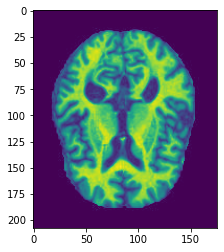

In [2]:
img =cv.imread("dataset/Alzheimer_s Dataset/train/ModerateDemented/moderateDem19.jpg",0)
img1 =cv.imread("dataset/Alzheimer_s Dataset/train/ModerateDemented/moderateDem19.jpg",0)
plt.imshow(img)

### 2. Resizeing Image

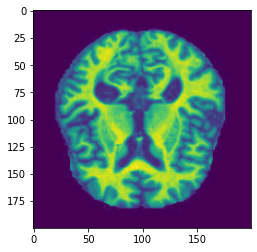

In [3]:
imgResize = cv.resize(img, (200, 200))
plt.imshow(imgResize)

### 3. Filtered Image  + 4. Contrast Enhancement

#### Applying blur
#### Comparing Different Gaussian filters (enhancment)


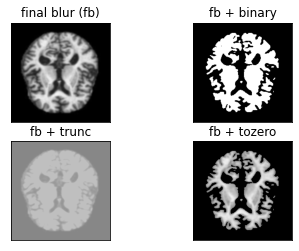

In [4]:
blur = cv.GaussianBlur(imgResize, (5, 5), 0)
img = cv.cvtColor(blur, 0)
ret, thresh1 = cv.threshold(img, 120, 255, cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(img, 120, 255, cv.THRESH_TRUNC)
ret, thresh3 = cv.threshold(img, 120, 255, cv.THRESH_TOZERO)
                             
plt.subplot(221),plt.imshow(img),plt.title('final blur (fb)')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(thresh1),plt.title('fb + binary')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(thresh2),plt.title('fb + trunc')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(thresh3),plt.title('fb + tozero')
plt.xticks([]), plt.yticks([])
plt.show()

### 5. Image Segmentation

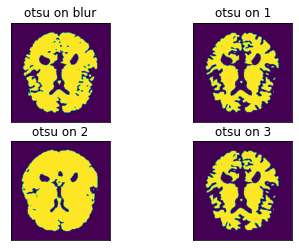

In [5]:
# img = img.astype("uint8")
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# thresh1 = thresh1.astype("uint8")
thresh1 = cv.cvtColor(thresh1, cv.COLOR_BGR2GRAY)
# thresh2 = thresh2.astype("uint8")
thresh2 = cv.cvtColor(thresh2, cv.COLOR_BGR2GRAY)
#thresh3 = thresh3.astype("uint8")
thresh3 = cv.cvtColor(thresh3, cv.COLOR_BGR2GRAY)
ret5, imgSeg1 = cv.threshold(img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
ret2, imgSeg2 = cv.threshold(thresh1, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
ret3, imgSeg3 = cv.threshold(thresh2, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
ret4, imgSeg4 = cv.threshold(thresh3, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

plt.subplot(221),plt.imshow(imgSeg1),plt.title('otsu on blur')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(imgSeg2),plt.title('otsu on 1')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(imgSeg3),plt.title('otsu on 2')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(imgSeg4),plt.title('otsu on 3')
plt.xticks([]), plt.yticks([])
plt.show()


### 6. Edge Detection

#### prewitt on processed image

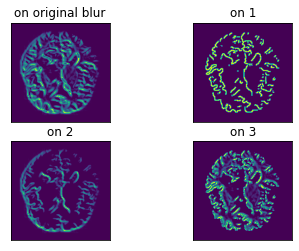

In [6]:

kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv.filter2D(img, -1, kernelx)
img_prewitty = cv.filter2D(img, -1, kernely)

img_prewitt1x = cv.filter2D(thresh1, -1, kernelx)
img_prewitt1y = cv.filter2D(thresh1, -1, kernely)

img_prewitt2x = cv.filter2D(thresh2, -1, kernelx)
img_prewitt2y = cv.filter2D(thresh2, -1, kernely)

img_prewitt3x = cv.filter2D(thresh3, -1, kernelx)
img_prewitt3y = cv.filter2D(thresh3, -1, kernely)

plt.subplot(221),plt.imshow(img_prewitty+img_prewittx),plt.title('on original blur')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(img_prewitt1y+img_prewitt1x),plt.title('on 1')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(img_prewitt2y+img_prewitt2x),plt.title('on 2')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(img_prewitt3y+img_prewitt3x),plt.title('on 3')
plt.xticks([]), plt.yticks([])
plt.show()

#### canny on processed image

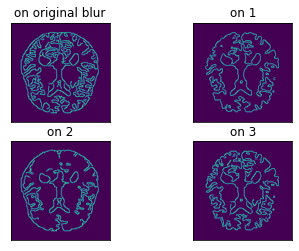

In [7]:
img_cannyO = cv.Canny(img,100,200)
img_canny1 = cv.Canny(thresh1,100,200)
img_canny2 = cv.Canny(thresh2,100,200)
img_canny3 = cv.Canny(thresh3,100,200)

plt.subplot(221),plt.imshow(img_cannyO),plt.title('on original blur')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(img_canny1),plt.title('on 1')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(img_canny2),plt.title('on 2')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(img_canny3),plt.title('on 3')
plt.xticks([]), plt.yticks([])
plt.show()

#### Edge detection on unprocessed image

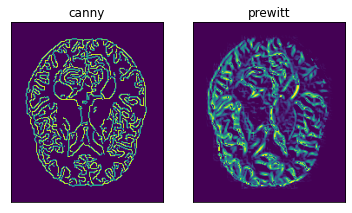

In [8]:
img_canny_o = cv.Canny(img1,100,200)
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx_o = cv.filter2D(img1, -1, kernelx)
img_prewitty_o = cv.filter2D(img1, -1, kernely)

plt.subplot(121),plt.imshow(img_canny_o),plt.title('canny')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_prewitty_o+img_prewittx_o),plt.title('prewitt')
plt.xticks([]), plt.yticks([])
plt.show()
